Project 3: Unsupervised Learning

tpham328

Wine Dataset

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy import stats
from sklearn.metrics import mean_squared_error, homogeneity_score, completeness_score, adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

from warnings import filterwarnings
filterwarnings(action='ignore')

In [45]:
data = pd.read_csv("winequality-white.csv")
print("Successfully Imported Data!")

data.head()
print(data.shape)

Successfully Imported Data!
(4898, 12)


In [46]:
data.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

<Axes: >

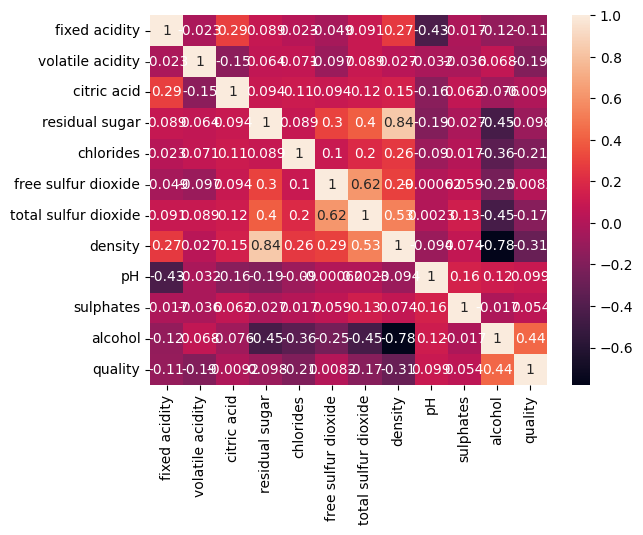

In [47]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [48]:


# Assuming 'data' is your dataframe and 'quality' is the label column
X = data.drop(columns='quality')
original_Y = data['quality']

def class_quality(value):
    if value <= 5:
        return 0
    elif value == 6:
        return 1
    elif value >= 7:
        return 2
Y = original_Y.apply(class_quality)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


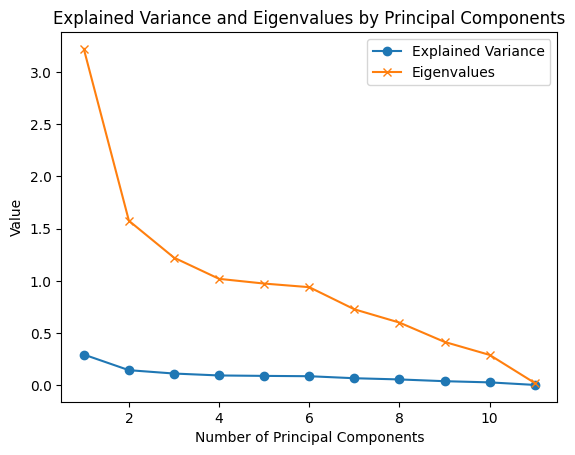

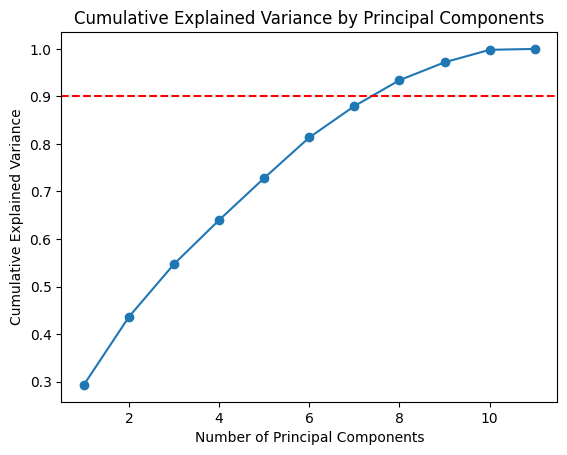

Optimal number of components for 90% variance: 8


In [49]:
# Apply PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance and eigenvalues
explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

# Plot explained variance
# plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='x', label='Eigenvalues')
plt.xlabel('Number of Principal Components')
plt.ylabel('Value')
plt.title('Explained Variance and Eigenvalues by Principal Components')
plt.legend()
plt.show()

# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
# plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')  # 95% variance threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

# Find the optimal number of components for 95% variance
optimal_n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f'Optimal number of components for 90% variance: {optimal_n_components}')

In [50]:

# Apply PCA with 6 components
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and the true labels
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(8)])
df_pca['quality'] = Y

# Calculate explained variance
# explained_variance = pca.explained_variance_ratio_
# cumulative_explained_variance = explained_variance.cumsum()
# print(f'Explained Variance Ratio: {explained_variance}')
# print(f'Cumulative Explained Variance: {cumulative_explained_variance}')

# Reconstruct the original data
X_reconstructed = pca.inverse_transform(X_pca)

# Calculate reconstruction error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f'Reconstruction Error: {reconstruction_error}')


Reconstruction Error: 0.06584362637013418


In [51]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=328)

# Train a classifier (e.g., logistic regression)
clf = LogisticRegression(random_state=328)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate classification performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy}')



Classification Accuracy: 0.5469387755102041


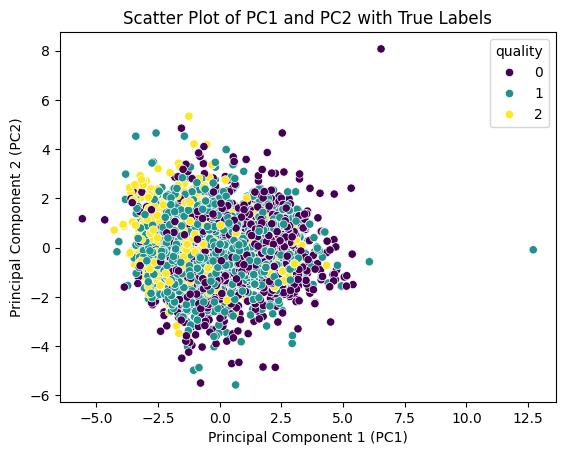

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the first two principal components
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='quality', palette='viridis')
plt.title('Scatter Plot of PC1 and PC2 with True Labels')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


# Apply KMeans Cluster to PCA

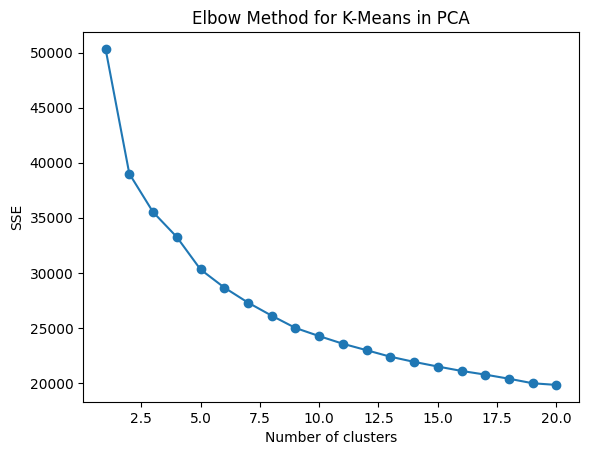

In [53]:

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means in PCA')
plt.show()


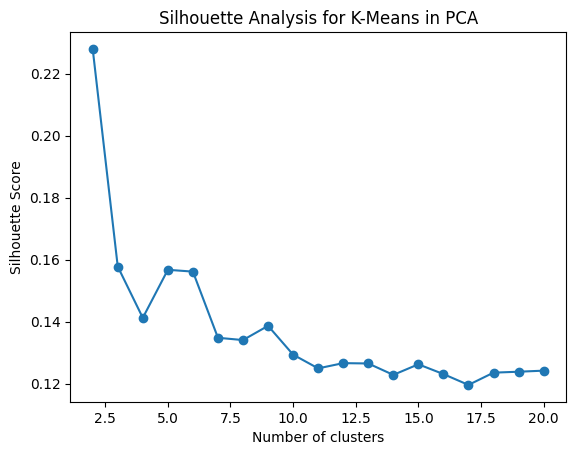

In [54]:
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans_labels = kmeans.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, kmeans_labels))

# plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means in PCA')
plt.show()


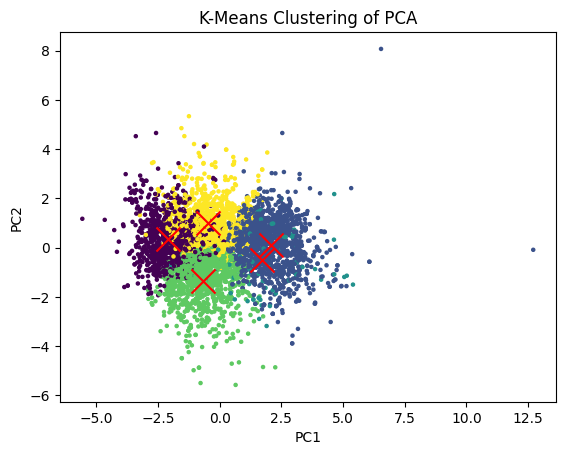

KMeans Homogeneity: 0.055
KMeans Completeness: 0.040


In [55]:
# Optimal number of clusters from the Elbow or Silhouette method
optimal_clusters = 5

kmeans = KMeans(n_clusters=optimal_clusters, random_state=328)
kmeans_labels = kmeans.fit_predict(X_pca)

# Calculate homogeneity and completeness for KMeans
kmeans_homogeneity = homogeneity_score(Y, kmeans_labels)
kmeans_completeness = completeness_score(Y, kmeans_labels)
# Scatter plot with cluster centers
# plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:,1], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of PCA')
plt.show()

print(f"KMeans Homogeneity: {kmeans_homogeneity:.3f}")
print(f"KMeans Completeness: {kmeans_completeness:.3f}")

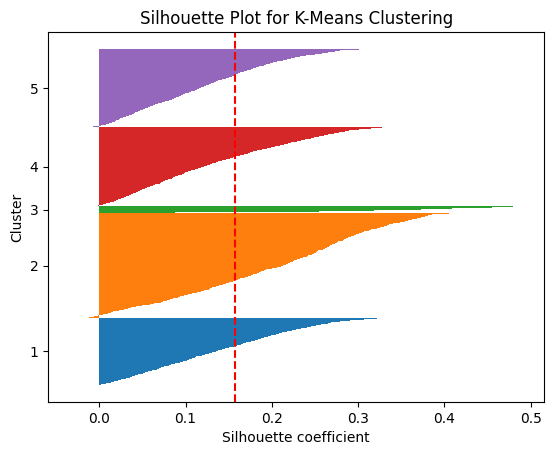

In [56]:

# Silhouette plot
silhouette_vals = silhouette_samples(X_pca, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering')
plt.show()

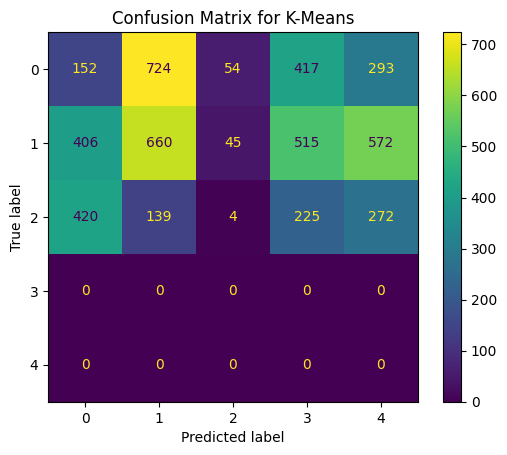

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_kmeans = confusion_matrix(Y, kmeans_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp_kmeans.plot()
plt.title('Confusion Matrix for K-Means')
plt.show()

[0.29293217 0.4361358  0.54719683 0.63978977 0.72827474 0.81361487
 0.87966924 0.93415637 0.9718058  0.99812281 1.        ]


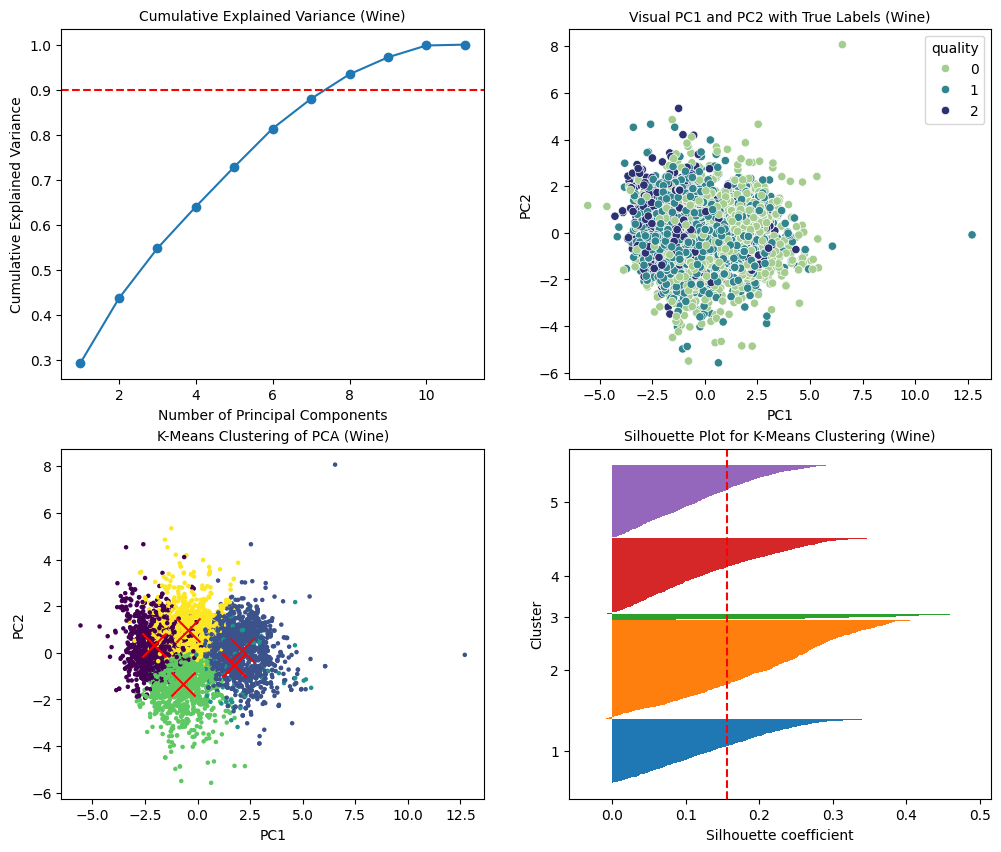

In [58]:
plt.figure(figsize=(12,10))

print(cumulative_explained_variance)
plt.subplot(2,2,1)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')  # 95% variance threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance (Wine)', fontsize = 10)

plt.subplot(2,2,2)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='quality', palette='crest')
plt.title('Visual PC1 and PC2 with True Labels (Wine)', fontsize = 10)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2,2,3)
plt.scatter(X_pca[:, 0], X_pca[:,1], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of PCA (Wine)', fontsize = 10)

plt.subplot(2,2,4)
silhouette_vals = silhouette_samples(X_pca, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering (Wine)', fontsize = 10)
plt.show()

# Apply EM Cluster to PCA

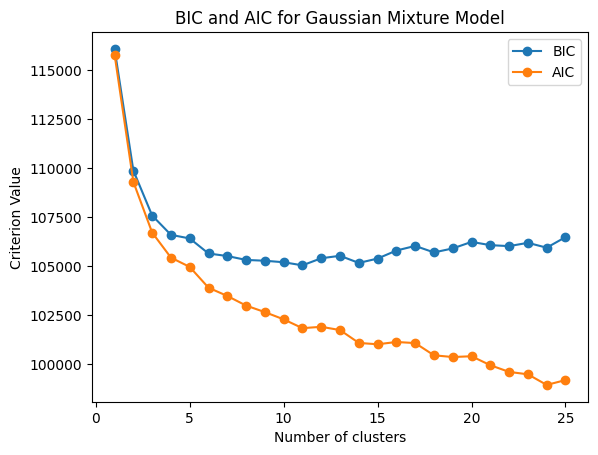

In [59]:
n_components_range = range(1, 26)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=328)
    gmm.fit(X_pca)
    bics.append(gmm.bic(X_pca))
    aics.append(gmm.aic(X_pca))

# Plot BIC and AIC

plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Model')
plt.legend()
plt.show()


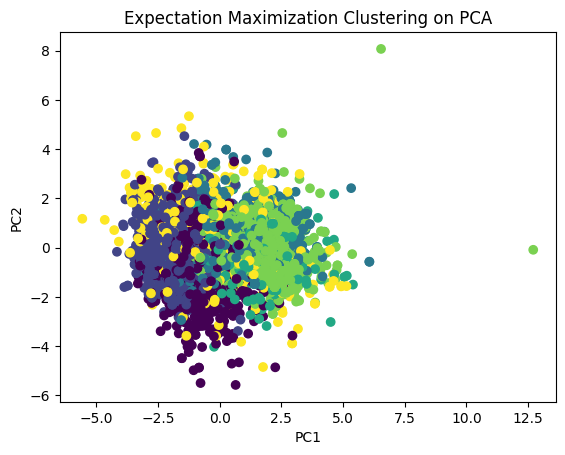

Gaussian Mixture Homogeneity: 0.065
Gaussian Mixture Completeness: 0.041


In [40]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components = 6, random_state=328)
gmm_labels = gmm.fit_predict(X_pca)

# Calculate homogeneity and completeness for Gaussian Mixture
gmm_homogeneity = homogeneity_score(Y, gmm_labels)
gmm_completeness = completeness_score(Y, gmm_labels)

# Scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Expectation Maximization Clustering on PCA')
plt.show()

print(f"Gaussian Mixture Homogeneity: {gmm_homogeneity:.3f}")
print(f"Gaussian Mixture Completeness: {gmm_completeness:.3f}")

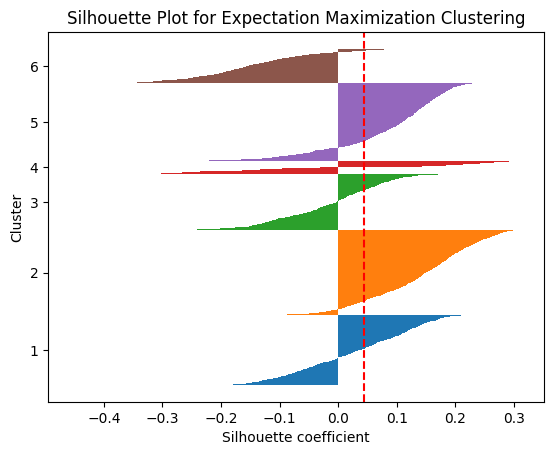

In [41]:
# Silhouette plot for GMM
silhouette_vals_gmm = silhouette_samples(X_pca, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for Expectation Maximization Clustering')
plt.show()

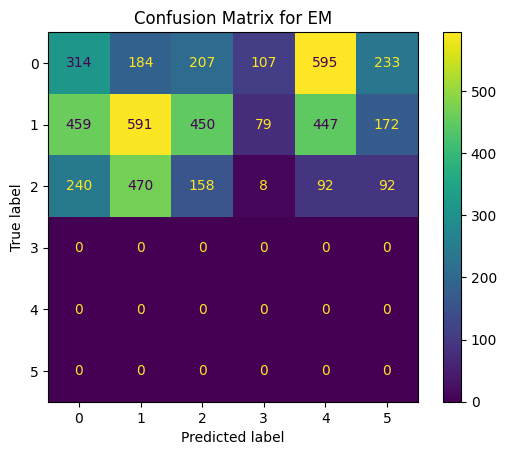

In [42]:
cm_gmm = confusion_matrix(Y, gmm_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_gmm)
disp_kmeans.plot()
plt.title('Confusion Matrix for EM')
plt.show()

Quick train/test model to see clustering with PCA impact

Adjusted Rand Index: 0.01


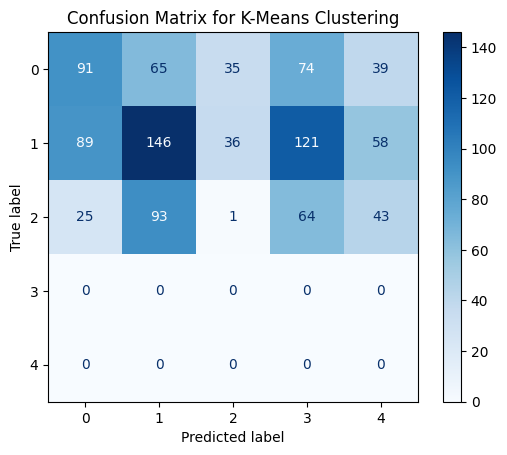

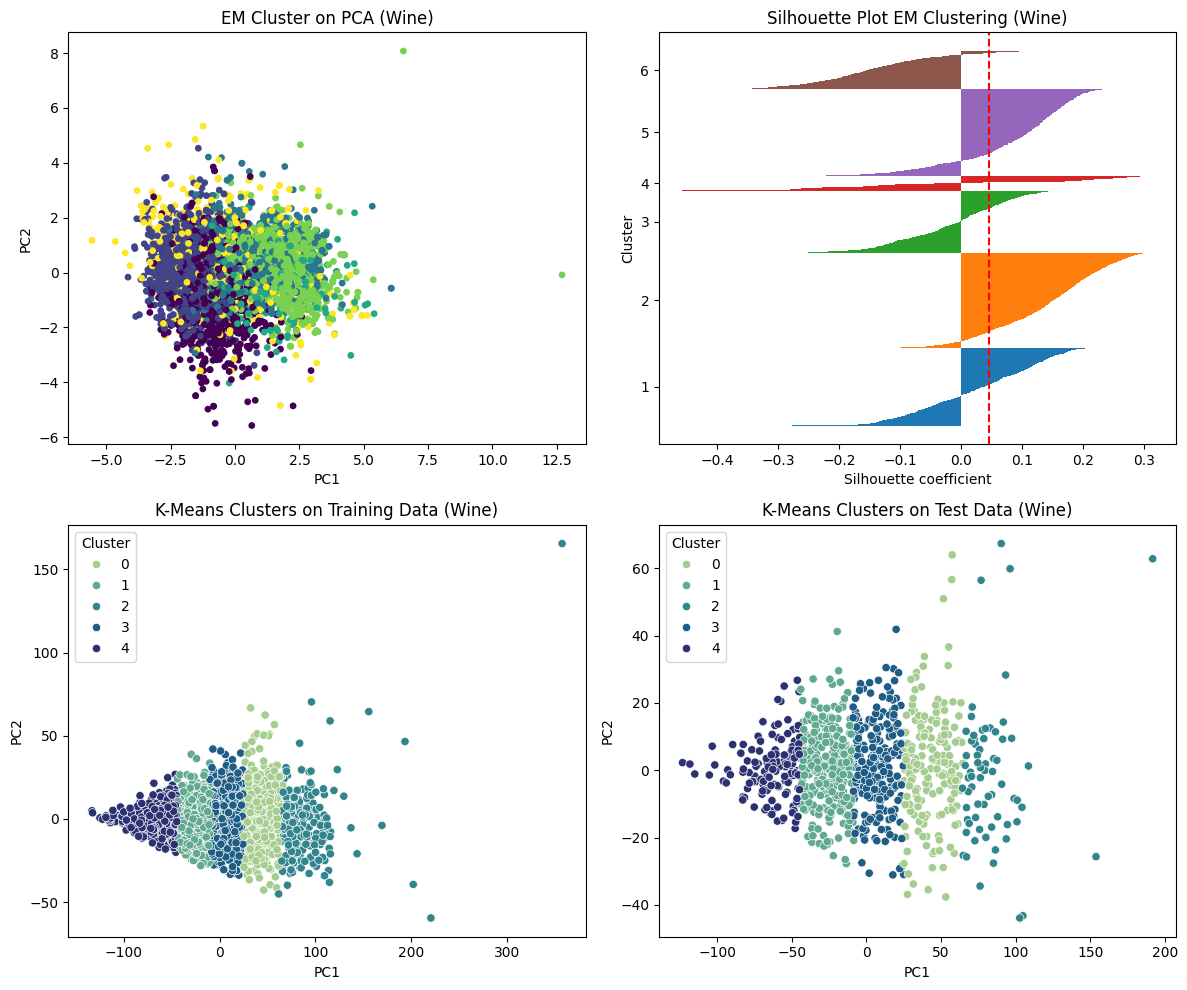

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=328)

# Apply PCA to the training data
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train K-Means clustering model on PCA-transformed training data
kmeans = KMeans(n_clusters=5, random_state=328)
kmeans.fit(X_train_pca)
train_labels = kmeans.labels_

# Predict clusters for the test data
test_labels = kmeans.predict(X_test_pca)

# Evaluate the clustering performance using Adjusted Rand Index
ari = adjusted_rand_score(y_test, test_labels)
print(f"Adjusted Rand Index: {ari:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

# Visualize the clusters in PCA-reduced space
plt.figure(figsize=(12,10))

plt.subplot(2, 2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, marker='o',s = 15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('EM Cluster on PCA (Wine)')

plt.subplot(2,2,2)
silhouette_vals_gmm = silhouette_samples(X_pca, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot EM Clustering (Wine)')

# Training set visualization
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_labels, palette='crest')
plt.title('K-Means Clusters on Training Data (Wine)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')

# Test set visualization
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_labels, palette='crest')
plt.title('K-Means Clusters on Test Data (Wine)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

# ICA

[-0.20806759]
[ 0.82449212 -0.28329742]
[ 1.78203452 -0.07485995  1.14552541]
[-0.03979573  1.89194252 14.12783385  1.09883301]
[ 1.091894    4.01769719 -0.31738378  1.45612705 16.23532065]
[-0.2155      0.80767556  7.49449509  2.31292978  2.23703222 28.56322699]
[ 1.08254474 28.63042577  6.06591726 10.63784244 -0.38494846  4.54517845
  0.74850677]
[-0.3840979  30.44439112  2.14318436  5.01951923  1.86783625  6.41570146
 10.52357966  0.63328984]
[ 0.36396458 -0.85969977  4.71403678  2.01897966  2.13006127 12.39705253
 43.198102    6.62384218  1.98130681]
[0.20806759259848162, 0.5538947708747415, 1.000806626748533, 4.289601276448017, 4.623684532879649, 6.938476607050966, 7.442194842592282, 7.1789499763502675, 8.254116174717588]


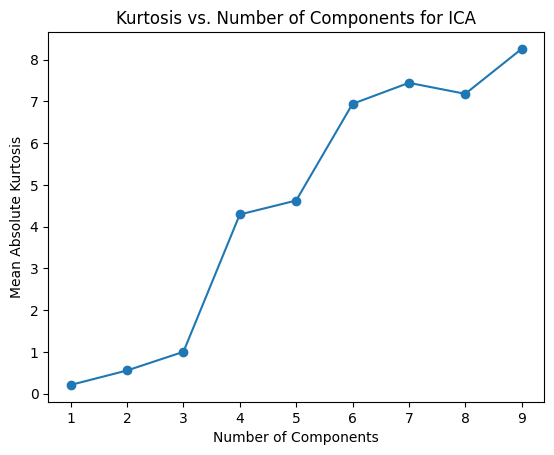

In [68]:


kurtosis_values = []

# Apply ICA with different 9 of components
for n_components in range(1, 10):
    ica = FastICA(n_components=n_components, random_state=328)
    X_ica = ica.fit_transform(X_scaled)
    # Calculate kurtosis for each component
    kurt_vals = stats.kurtosis(X_ica)
    print(kurt_vals)
    # Mean kurtosis value for the current number of components
    kurtosis_values.append(np.mean(np.abs(kurt_vals)))

print(kurtosis_values)
# Plot kurtosis values

plt.plot(range(1,10), kurtosis_values, marker='o')

plt.xlabel('Number of Components')
plt.ylabel('Mean Absolute Kurtosis')
plt.title('Kurtosis vs. Number of Components for ICA')
plt.show()


[ 1.08254474 28.63042577  6.06591726 10.63784244 -0.38494846  4.54517845
  0.74850677]


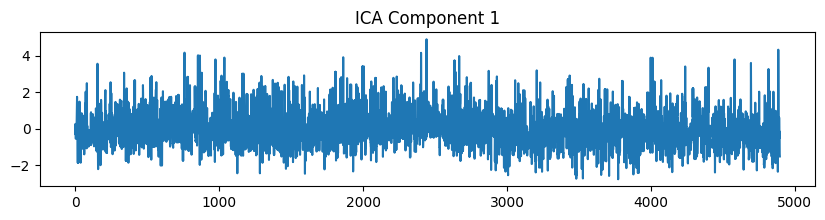

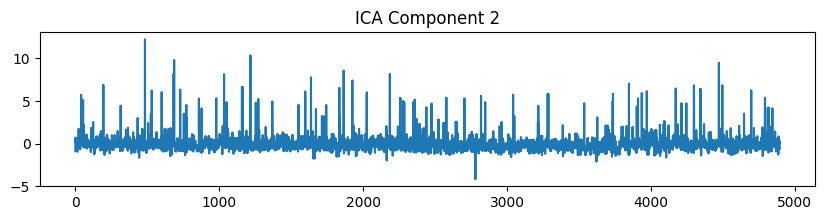

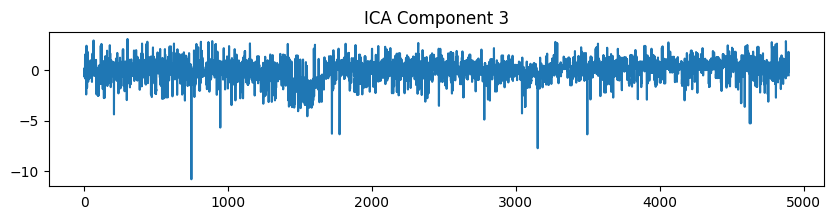

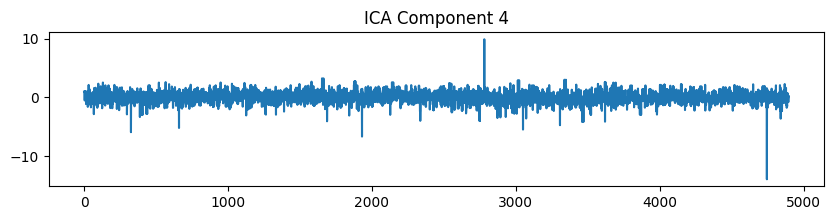

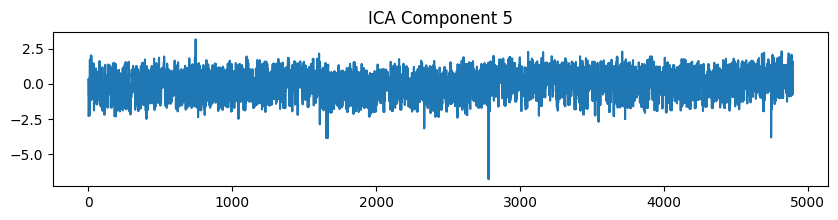

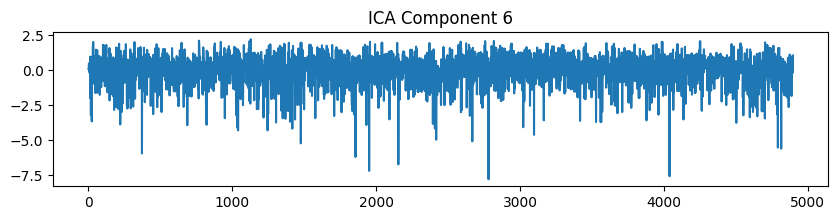

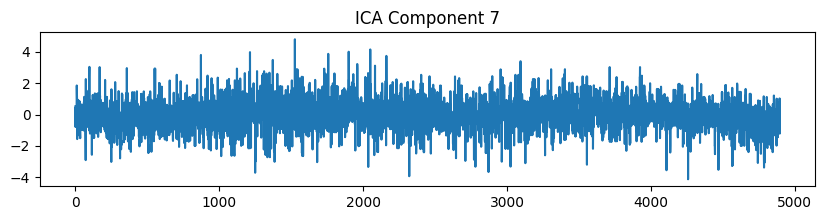

In [69]:

# Assuming 'ica' is the fitted FastICA model with n_components=5
ica = FastICA(n_components=7, random_state=328)
X_ica = ica.fit_transform(X_scaled)

kurt_vals = stats.kurtosis(X_ica)
print(kurt_vals)

# Plot each of the 
for i in range(7):
    plt.figure(figsize=(10, 2))
    plt.plot(X_ica[:, i])
    plt.title(f'ICA Component {i+1}')
    plt.show()

In [61]:
# Reconstruct the original data
X_reconstructed = ica.inverse_transform(X_ica)

# Calculate reconstruction error (mean squared error)
from sklearn.metrics import mean_squared_error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f'Reconstruction Error: {reconstruction_error}')


Reconstruction Error: 0.1203307608830288


In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-Means clustering on ICA components
kmeans = KMeans(n_clusters=3, random_state=328)  # Assuming 3 clusters
kmeans_labels = kmeans.fit_predict(X_ica)

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X_ica, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.13939236022550874


In [63]:
# Reconstruct the original data
X_reconstructed = ica.inverse_transform(X_ica)

# Calculate reconstruction error (mean squared error)
from sklearn.metrics import mean_squared_error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f'Reconstruction Error: {reconstruction_error}')


Reconstruction Error: 0.1203307608830288


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ica, Y, test_size=0.2, random_state=328)

# Train a classifier (e.g., logistic regression)
clf = LogisticRegression(random_state=328)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate classification performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy}')


Classification Accuracy: 0.5295918367346939


In [65]:
# Find the indices of the two components with the highest absolute kurtosis
print(kurt_vals)
most_meaningful_indices = np.argsort(np.abs(kurt_vals))[-2:]

print(most_meaningful_indices)
# Extract the two most meaningful components
X_ica_most_meaningful = X_ica[:, most_meaningful_indices]


[ 1.08254474 28.63042577  6.06591726 10.63784244 -0.38494846  4.54517845
  0.74850677]
[3 1]


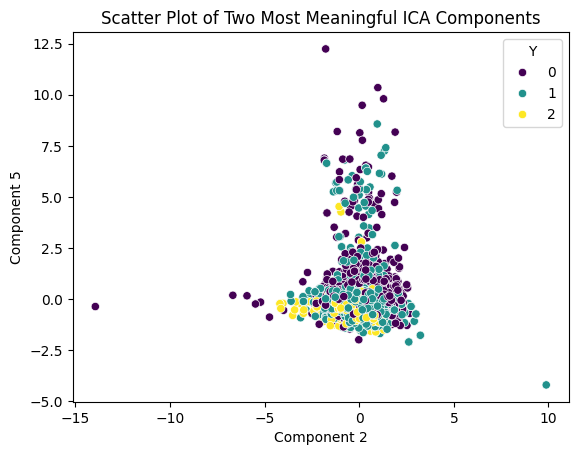

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
df_ica = pd.DataFrame(X_ica_most_meaningful, columns=['Component 2', 'Component 5'])
df_ica['Y'] = Y

# Scatter plot of the two most meaningful components
# plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ica, x='Component 2', y='Component 5', hue='Y', palette='viridis')
plt.title('Scatter Plot of Two Most Meaningful ICA Components')
plt.xlabel('Component 2')
plt.ylabel('Component 5')
plt.show()


# Apply K Means Cluster to ICA

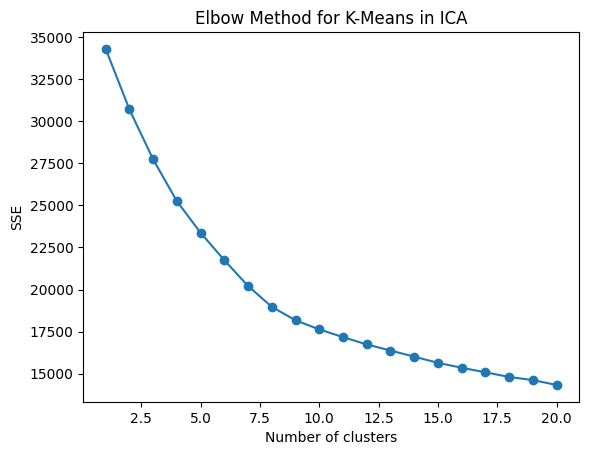

In [143]:
# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans.fit(X_ica)
    sse.append(kmeans.inertia_)

# plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means in ICA')
plt.show()


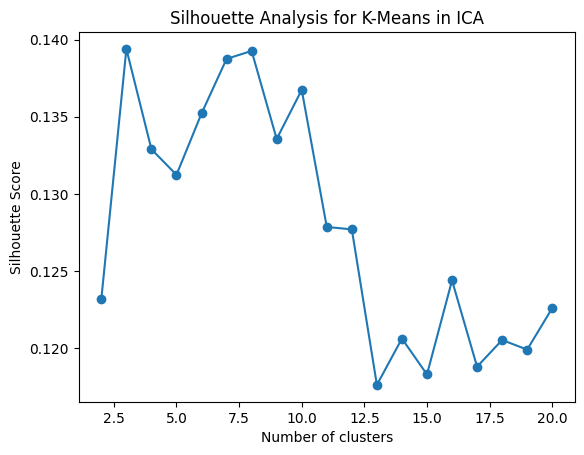

In [144]:
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans_labels = kmeans.fit_predict(X_ica)
    silhouette_scores.append(silhouette_score(X_ica, kmeans_labels))

# plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means in ICA')
plt.show()

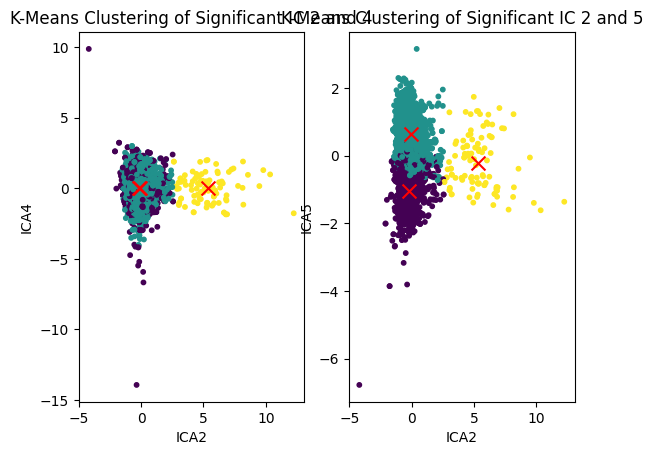

KMeans Homogeneity: 0.034
KMeans Completeness: 0.047


In [70]:
# Optimal number of clusters from the Elbow or Silhouette method
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=328)
kmeans_labels = kmeans.fit_predict(X_ica)

# Calculate homogeneity and completeness for KMeans
kmeans_homogeneity = homogeneity_score(Y, kmeans_labels)
kmeans_completeness = completeness_score(Y, kmeans_labels)
# Scatter plot with cluster centers
# plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.scatter(X_ica[:, 1], X_ica[:,3], c=kmeans_labels, marker='o', s =10)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=100, c='red', marker='x')
plt.xlabel('ICA2')
plt.ylabel('ICA4')
plt.title('K-Means Clustering of Significant IC 2 and 4')

plt.subplot(1,2,2)
plt.scatter(X_ica[:, 1], X_ica[:,4], c=kmeans_labels, marker='o', s =10)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 4], s=100, c='red', marker='x')
plt.xlabel('ICA2')
plt.ylabel('ICA5')
plt.title('K-Means Clustering of Significant IC 2 and 5')
plt.show()

plt.show()

print(f"KMeans Homogeneity: {kmeans_homogeneity:.3f}")
print(f"KMeans Completeness: {kmeans_completeness:.3f}")

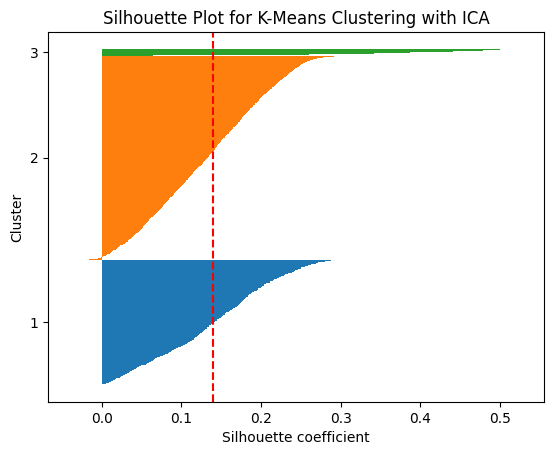

In [178]:

# Silhouette plot
silhouette_vals = silhouette_samples(X_ica, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering with ICA')
plt.show()

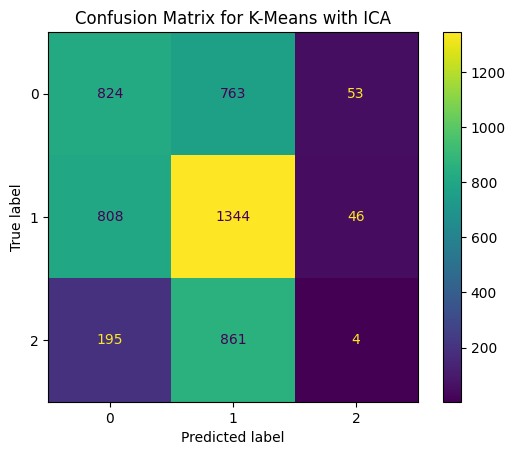

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_kmeans = confusion_matrix(Y, kmeans_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp_kmeans.plot()
plt.title('Confusion Matrix for K-Means with ICA')
plt.show()

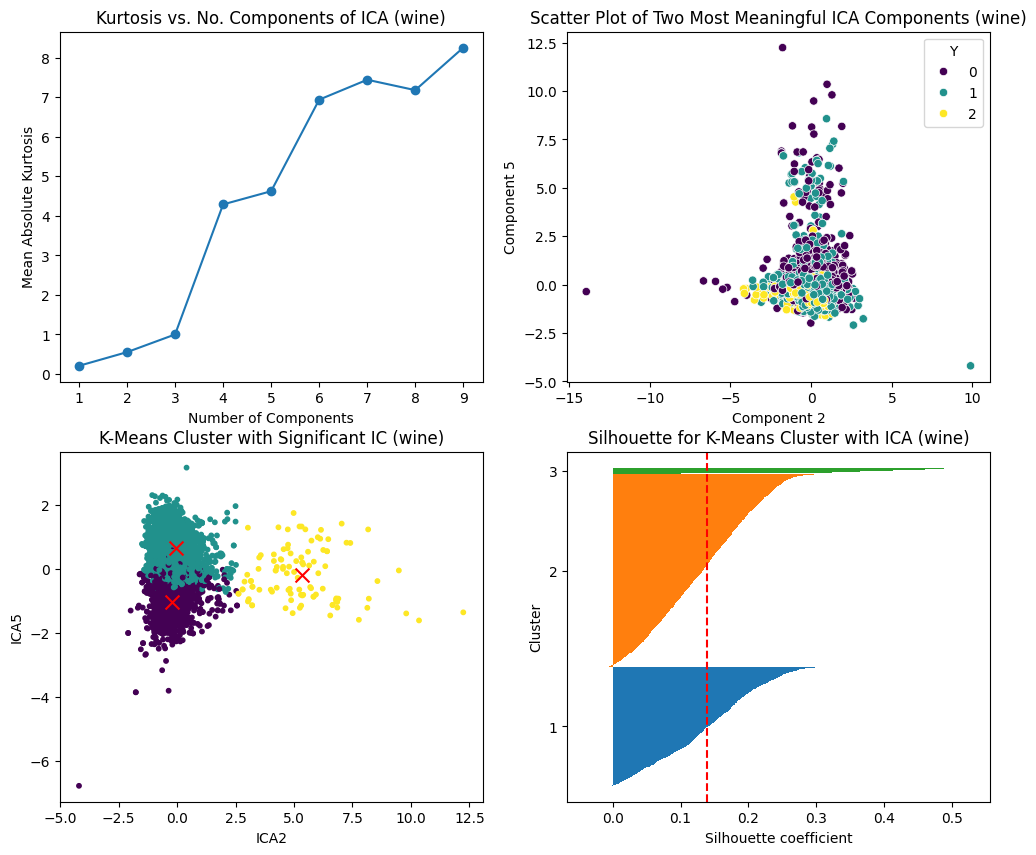

In [71]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(range(1,10), kurtosis_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Absolute Kurtosis')
plt.title('Kurtosis vs. No. Components of ICA (wine)')


plt.subplot(2,2,2)
sns.scatterplot(data=df_ica, x='Component 2', y='Component 5', hue='Y', palette='viridis')
plt.title('Scatter Plot of Two Most Meaningful ICA Components (wine)')
plt.xlabel('Component 2')
plt.ylabel('Component 5')

plt.subplot(2,2,3)
plt.scatter(X_ica[:, 1], X_ica[:,4], c=kmeans_labels, marker='o', s =10)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 4], s=100, c='red', marker='x')
plt.xlabel('ICA2')
plt.ylabel('ICA5')
plt.title('K-Means Cluster with Significant IC (wine)')

plt.subplot(2,2,4)
silhouette_vals = silhouette_samples(X_ica, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette for K-Means Cluster with ICA (wine)')
plt.show()

# Apply EM Cluster to ICA

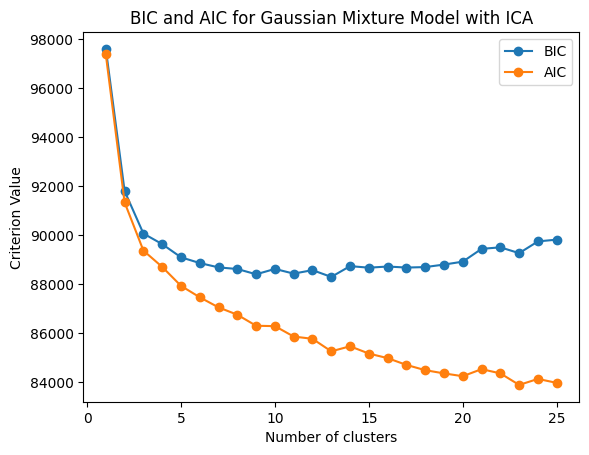

In [181]:
n_components_range = range(1, 26)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=328)
    gmm.fit(X_ica)
    bics.append(gmm.bic(X_ica))
    aics.append(gmm.aic(X_ica))

# Plot BIC and AIC

plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Model with ICA')
plt.legend()
plt.show()


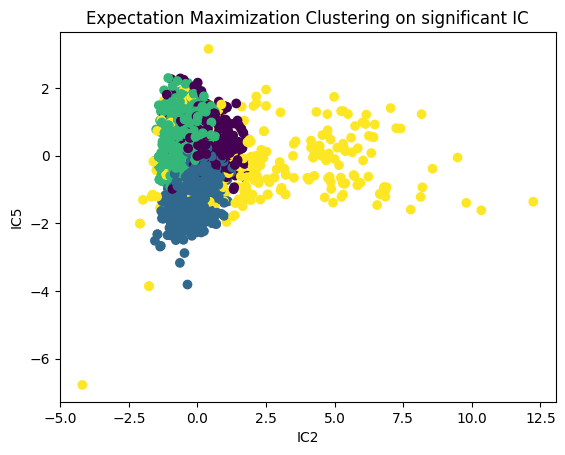

Gaussian Mixture Homogeneity: 0.070
Gaussian Mixture Completeness: 0.060


In [72]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components = 4, random_state=328)
gmm_labels = gmm.fit_predict(X_ica)

# Calculate homogeneity and completeness for Gaussian Mixture
gmm_homogeneity = homogeneity_score(Y, gmm_labels)
gmm_completeness = completeness_score(Y, gmm_labels)

# Scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(X_ica[:, 1], X_ica[:, 4], c=gmm_labels, marker='o')
plt.xlabel('IC2')
plt.ylabel('IC5')
plt.title('Expectation Maximization Clustering on significant IC')
plt.show()

print(f"Gaussian Mixture Homogeneity: {gmm_homogeneity:.3f}")
print(f"Gaussian Mixture Completeness: {gmm_completeness:.3f}")

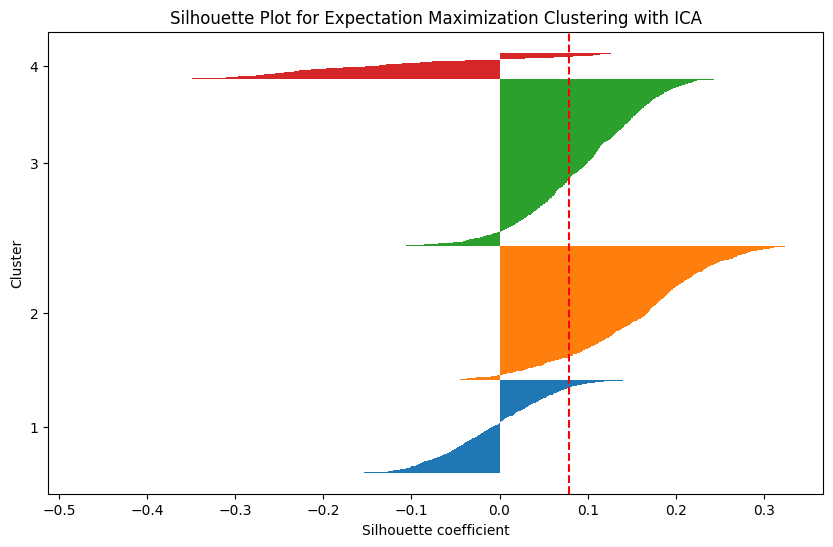

In [213]:
# Silhouette plot for GMM
silhouette_vals_gmm = silhouette_samples(X_ica, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for Expectation Maximization Clustering with ICA')
plt.show()

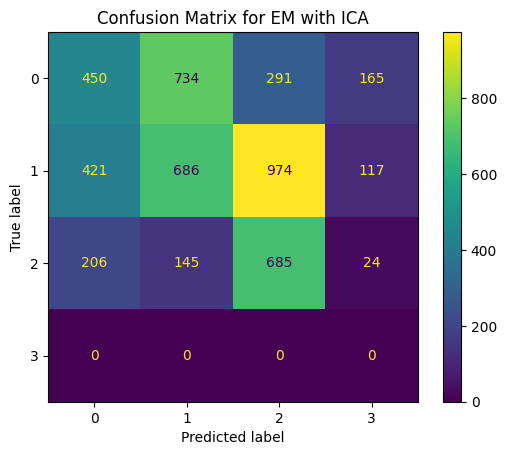

In [214]:
cm_gmm = confusion_matrix(Y, gmm_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_gmm)
disp_kmeans.plot()
plt.title('Confusion Matrix for EM with ICA')
plt.show()

Quick train/test split model to see Clustering with ICA

Adjusted Rand Index: 0.07


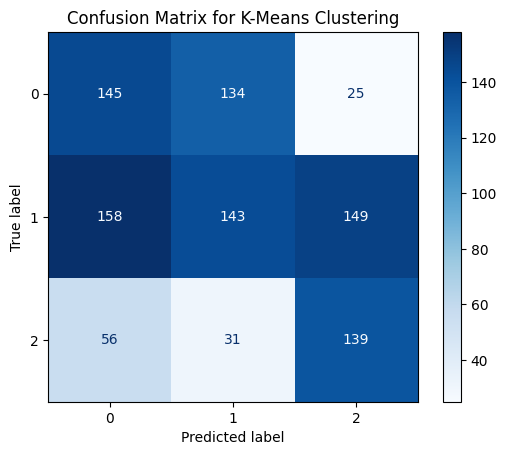

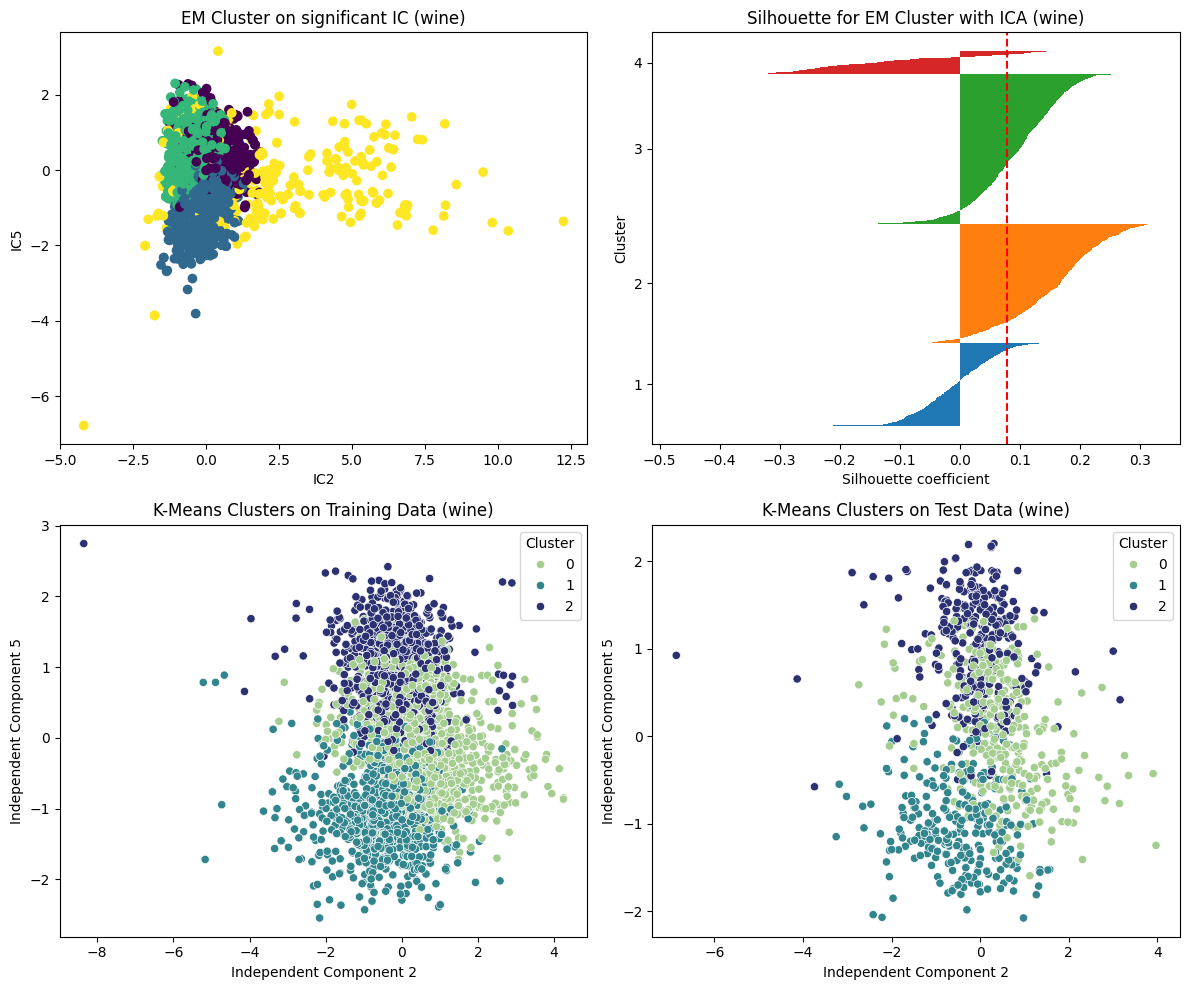

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=328)

# Apply ICA to the training data
ica = FastICA(n_components=7, random_state=328)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

# Train K-Means clustering model on ICA-transformed training data
kmeans = KMeans(n_clusters=3, random_state=328)
kmeans.fit(X_train_ica)
train_labels = kmeans.labels_

# Predict clusters for the test data
test_labels = kmeans.predict(X_test_ica)

# Evaluate the clustering performance using Adjusted Rand Index
ari = adjusted_rand_score(y_test, test_labels)
print(f"Adjusted Rand Index: {ari:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
plt.scatter(X_ica[:, 1], X_ica[:, 4], c=gmm_labels, marker='o')
plt.xlabel('IC2')
plt.ylabel('IC5')
plt.title('EM Cluster on significant IC (wine)')

plt.subplot(2,2,2)
silhouette_vals_gmm = silhouette_samples(X_ica, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette for EM Cluster with ICA (wine)')
# Training set visualization
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_train_ica[:, 1], y=X_train_ica[:,4], hue=train_labels, palette='crest')
plt.title('K-Means Clusters on Training Data (wine)')
plt.xlabel('Independent Component 2')
plt.ylabel('Independent Component 5')
plt.legend(title='Cluster')

# Test set visualization
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test_ica[:, 1], y=X_test_ica[:, 4], hue=test_labels, palette='crest')
plt.title('K-Means Clusters on Test Data (wine)')
plt.xlabel('Independent Component 2')
plt.ylabel('Independent Component 5')
plt.legend(title='Cluster')


plt.tight_layout()
plt.show()

# Randomized Projection

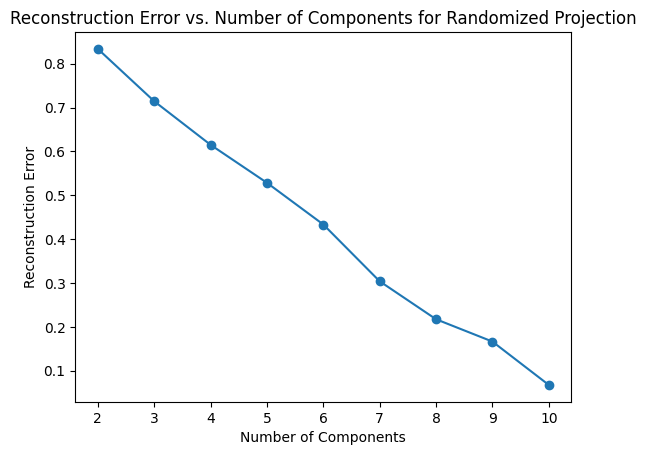

In [89]:
reconstruction_errors = []

# Apply Gaussian Random Projection with different number of components
for n_components in range(2, min(X_scaled.shape[1], 21)):
    grp = GaussianRandomProjection(n_components=n_components, random_state=328)
    X_grp = grp.fit_transform(X_scaled)
    # Compute the pseudo-inverse of the projection matrix
    components_pinv = np.linalg.pinv(grp.components_.T)
    # Reconstruct the original data using the pseudo-inverse of the components
    X_reconstructed = np.dot(X_grp, components_pinv)
    # Calculate reconstruction error
    error = mean_squared_error(X_scaled, X_reconstructed)
    reconstruction_errors.append(error)

# Plot reconstruction errors
# plt.figure(figsize=(10, 6))
plt.plot(range(2, min(X_scaled.shape[1], 21)), reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Components for Randomized Projection')
plt.show()

In [90]:
# Apply Randomized Projection 
grp = GaussianRandomProjection(n_components=4, random_state=328)
X_grp = grp.fit_transform(X_scaled)


# Compute the pseudo-inverse of the projection matrix
components_pinv = np.linalg.pinv(grp.components_.T)
# Reconstruct the original data using the pseudo-inverse of the components
X_reconstructed = np.dot(X_grp, components_pinv)

# Calculate reconstruction error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f'Reconstruction Error: {reconstruction_error}')

Reconstruction Error: 0.6151218342789073


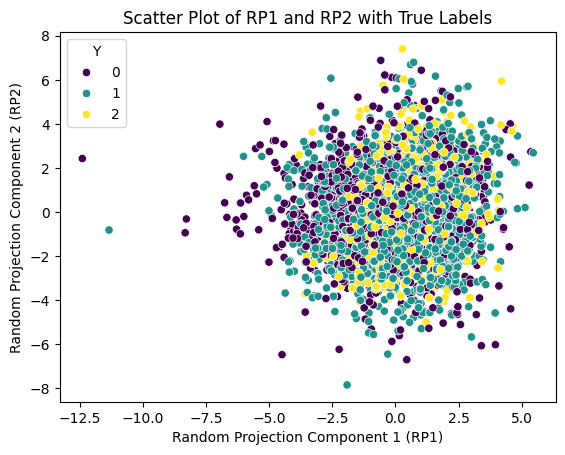

In [91]:
# Create a DataFrame with the RP results and the true labels
df_grp = pd.DataFrame(X_grp, columns=[f'RP{i+1}' for i in range(4)])
df_grp['Y'] = Y

# Scatter plot of the first two components
# plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_grp, x='RP3', y='RP2', hue='Y', palette='viridis')
plt.title('Scatter Plot of RP1 and RP2 with True Labels')
plt.xlabel('Random Projection Component 1 (RP1)')
plt.ylabel('Random Projection Component 2 (RP2)')
plt.show()

# Apply K Mean Cluster to RP

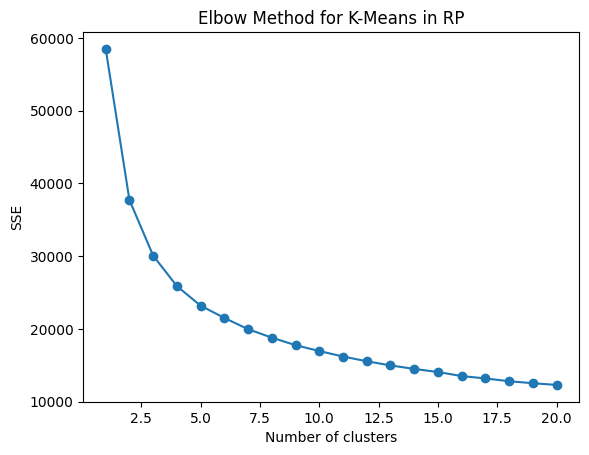

In [92]:

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans.fit(X_grp)
    sse.append(kmeans.inertia_)

# plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means in RP')
plt.show()


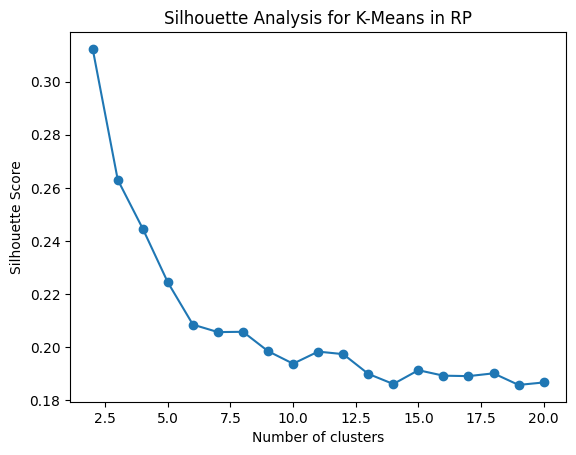

In [93]:
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans_labels = kmeans.fit_predict(X_grp)
    silhouette_scores.append(silhouette_score(X_grp, kmeans_labels))

# plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means in RP')
plt.show()


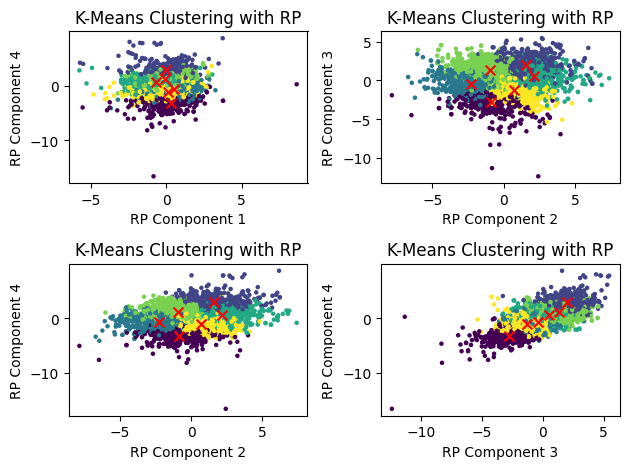

KMeans Homogeneity: 0.031
KMeans Completeness: 0.019


In [94]:
# Optimal number of clusters from the Elbow or Silhouette method
optimal_clusters = 6

kmeans = KMeans(n_clusters=optimal_clusters, random_state=328)
kmeans_labels = kmeans.fit_predict(X_grp)

# Calculate homogeneity and completeness for KMeans
kmeans_homogeneity = homogeneity_score(Y, kmeans_labels)
kmeans_completeness = completeness_score(Y, kmeans_labels)
# Scatter plot with cluster centers
# plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.scatter(X_grp[:, 0], X_grp[:,3], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=50, c='red', marker='x')
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP')

plt.subplot(2,2,2)
plt.scatter(X_grp[:, 1], X_grp[:,2], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=50, c='red', marker='x')
plt.xlabel('RP Component 2')
plt.ylabel('RP Component 3')
plt.title('K-Means Clustering with RP')

plt.subplot(2,2,3)
plt.scatter(X_grp[:, 1], X_grp[:,3], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=50, c='red', marker='x')
plt.xlabel('RP Component 2')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP')

plt.subplot(2,2,4)
plt.scatter(X_grp[:, 2], X_grp[:,3], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=50, c='red', marker='x')
plt.xlabel('RP Component 3')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP')

plt.tight_layout()
plt.show()

print(f"KMeans Homogeneity: {kmeans_homogeneity:.3f}")
print(f"KMeans Completeness: {kmeans_completeness:.3f}")

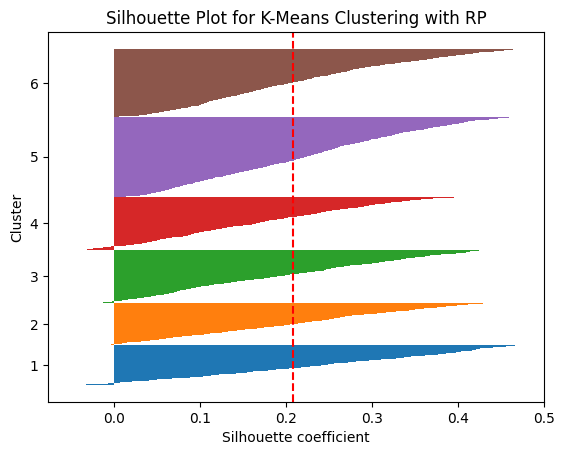

In [95]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Silhouette plot
silhouette_vals = silhouette_samples(X_grp, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering with RP')
plt.show()

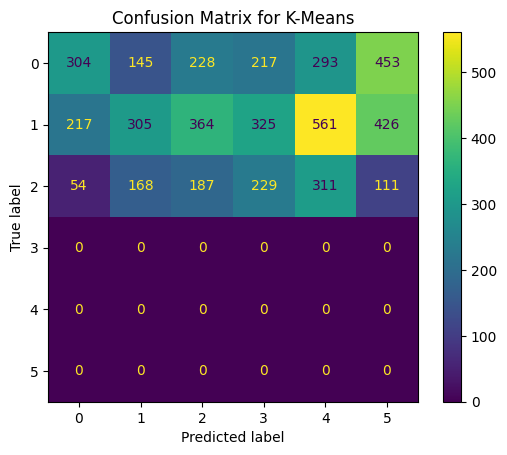

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_kmeans = confusion_matrix(Y, kmeans_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp_kmeans.plot()
plt.title('Confusion Matrix for K-Means')
plt.show()

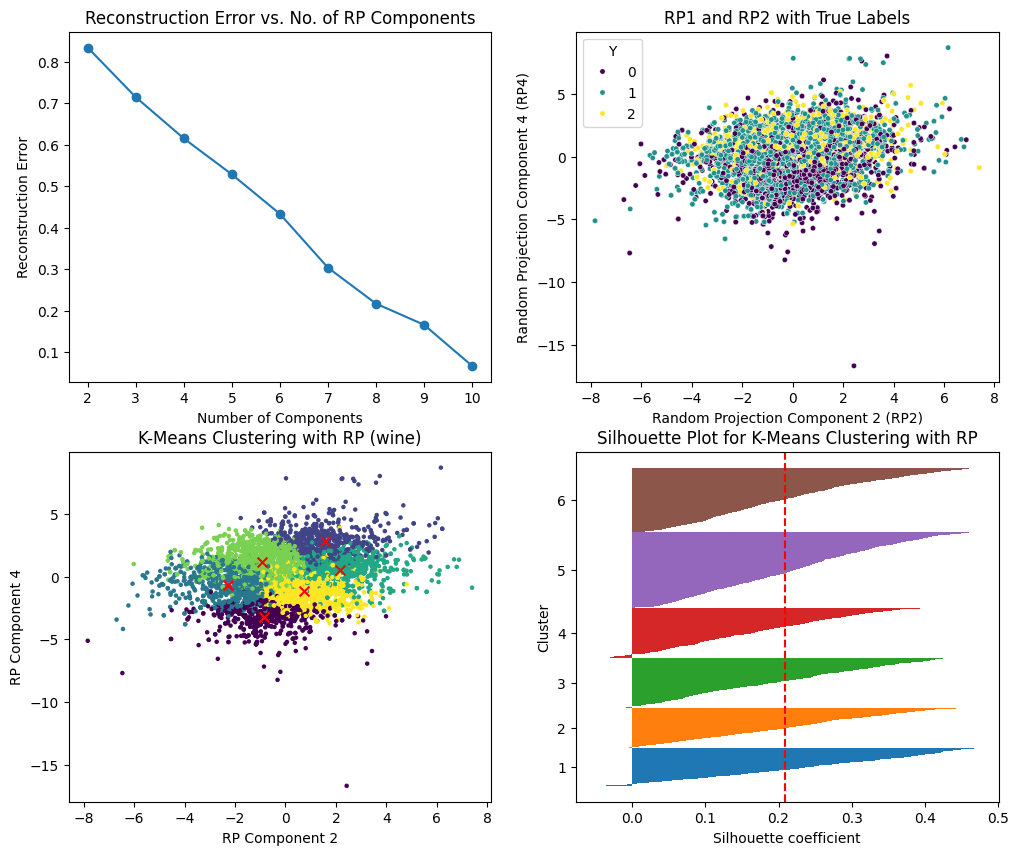

In [102]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(range(2, min(X_scaled.shape[1], 21)), reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. No. of RP Components')

plt.subplot(2,2,2)
sns.scatterplot(data=df_grp, x='RP2', y='RP4', hue='Y', palette='viridis',s=15)
plt.title('RP1 and RP2 with True Labels')
plt.xlabel('Random Projection Component 2 (RP2)')
plt.ylabel('Random Projection Component 4 (RP4)')

plt.subplot(2,2,3)
plt.scatter(X_grp[:, 1], X_grp[:,3], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=50, c='red', marker='x')
plt.xlabel('RP Component 2')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP (wine)')

silhouette_vals = silhouette_samples(X_grp, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

plt.subplot(2,2,4)
for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering with RP')
plt.show()


# Apply EM Clustering to RP

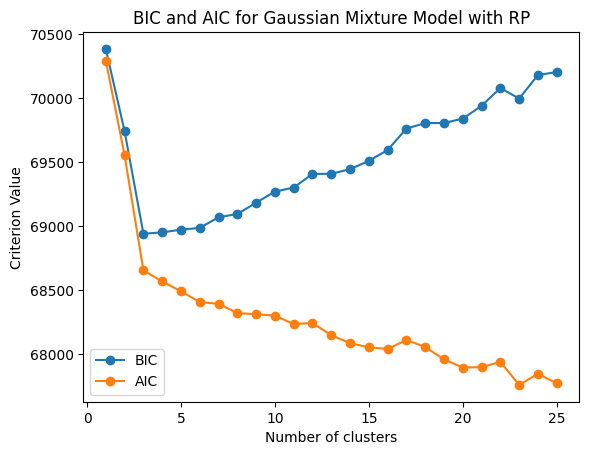

In [103]:
n_components_range = range(1, 26)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=328)
    gmm.fit(X_grp)
    bics.append(gmm.bic(X_grp))
    aics.append(gmm.aic(X_grp))

# Plot BIC and AIC

plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Model with RP')
plt.legend()
plt.show()

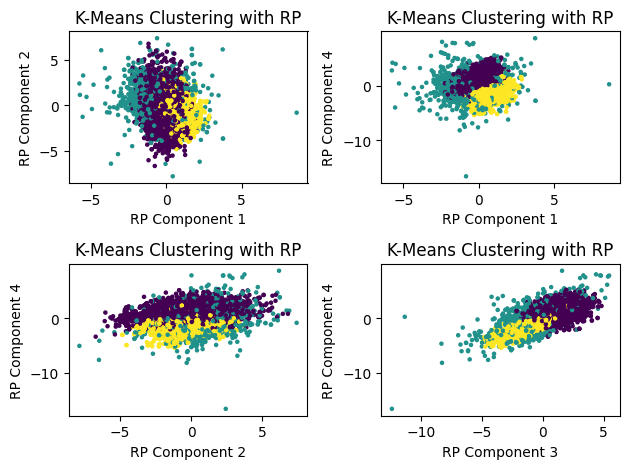

Gaussian Mixture Homogeneity: 0.024
Gaussian Mixture Completeness: 0.026


In [104]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components = 3, random_state=328)
gmm_labels = gmm.fit_predict(X_grp)

# Calculate homogeneity and completeness for Gaussian Mixture
gmm_homogeneity = homogeneity_score(Y, gmm_labels)
gmm_completeness = completeness_score(Y, gmm_labels)

# Scatter plot
# plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.scatter(X_grp[:, 0], X_grp[:,1], c=gmm_labels, marker='o', s =5)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('K-Means Clustering with RP')

plt.subplot(2,2,2)
plt.scatter(X_grp[:, 0], X_grp[:,3], c=gmm_labels, marker='o', s =5)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP')

plt.subplot(2,2,3)
plt.scatter(X_grp[:, 1], X_grp[:,3], c=gmm_labels, marker='o', s =5)
plt.xlabel('RP Component 2')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP')

plt.subplot(2,2,4)
plt.scatter(X_grp[:, 2], X_grp[:,3], c=gmm_labels, marker='o', s =5)
plt.xlabel('RP Component 3')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP')

plt.tight_layout()
plt.show()

print(f"Gaussian Mixture Homogeneity: {gmm_homogeneity:.3f}")
print(f"Gaussian Mixture Completeness: {gmm_completeness:.3f}")

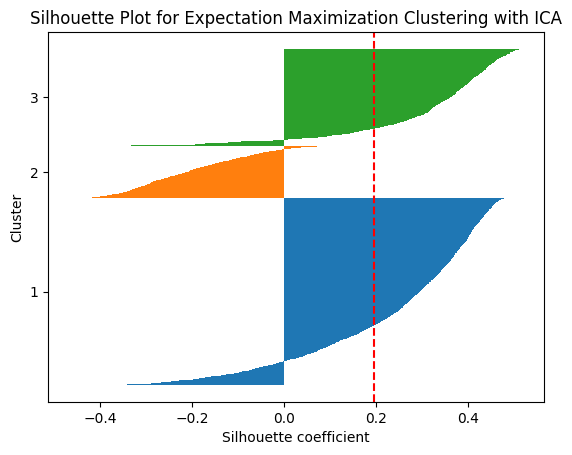

In [105]:
# Silhouette plot for GMM
silhouette_vals_gmm = silhouette_samples(X_grp, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for Expectation Maximization Clustering with ICA')
plt.show()

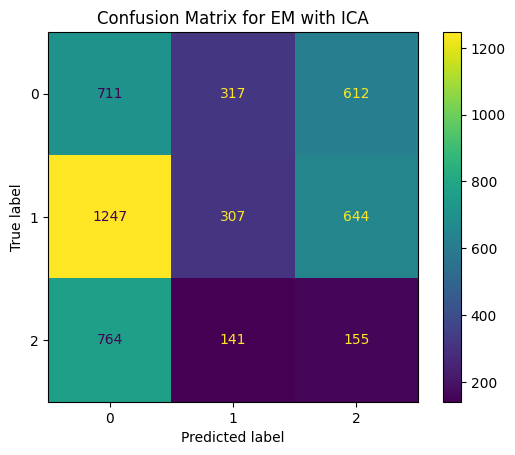

In [106]:
cm_gmm = confusion_matrix(Y, gmm_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_gmm)
disp_kmeans.plot()
plt.title('Confusion Matrix for EM with ICA')
plt.show()

Split/ Train/ Test with Clustering and RP

Adjusted Rand Index: 0.01


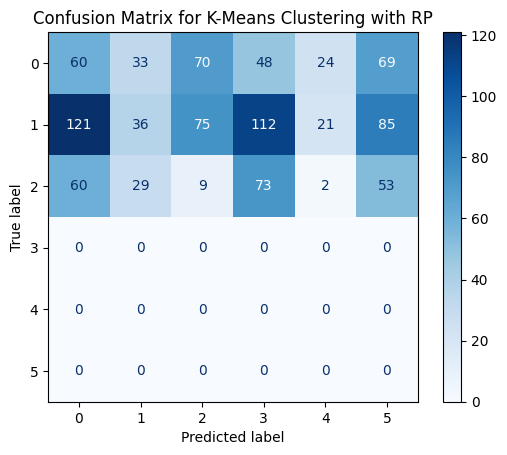

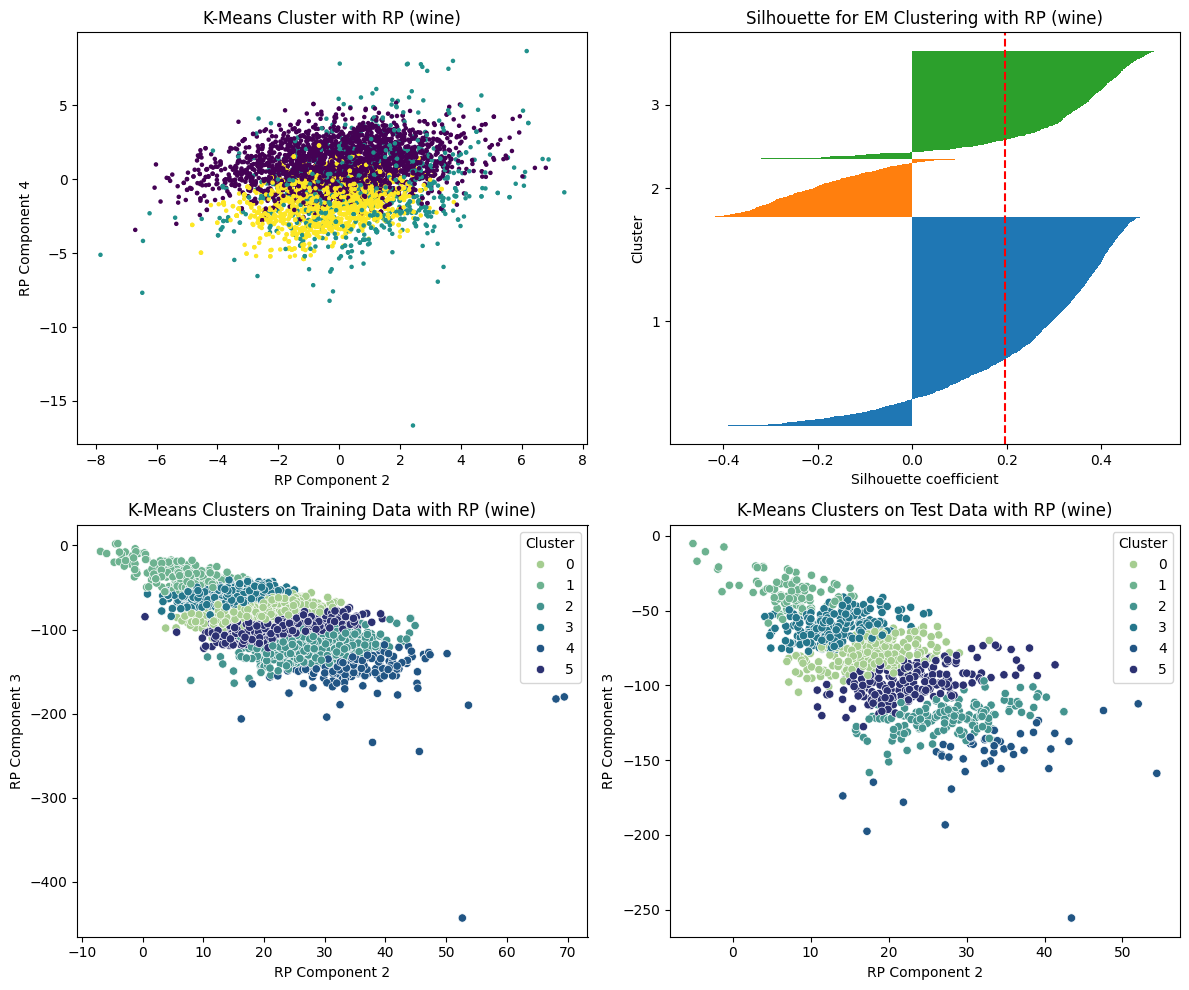

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=328)

# Apply ICA to the training data
grp = GaussianRandomProjection(n_components=4, random_state=328)
X_train_rp = grp.fit_transform(X_train)
X_test_rp = grp.transform(X_test)

# Train K-Means clustering model on ICA-transformed training data
kmeans = KMeans(n_clusters=6, random_state=328)
kmeans.fit(X_train_rp)
train_labels = kmeans.labels_

# Predict clusters for the test data
test_labels = kmeans.predict(X_test_rp)

# Evaluate the clustering performance using Adjusted Rand Index
ari = adjusted_rand_score(y_test, test_labels)
print(f"Adjusted Rand Index: {ari:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Means Clustering with RP')
plt.show()

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.scatter(X_grp[:, 1], X_grp[:,3], c=gmm_labels, marker='o', s =5)
plt.xlabel('RP Component 2')
plt.ylabel('RP Component 4')
plt.title('K-Means Cluster with RP (wine)')

plt.subplot(2,2,2)
silhouette_vals_gmm = silhouette_samples(X_grp, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette for EM Clustering with RP (wine)')

plt.subplot(2, 2, 3)
sns.scatterplot(x=X_train_rp[:, 1], y=X_train_rp[:, 3], hue=train_labels, palette='crest')
plt.title('K-Means Clusters on Training Data with RP (wine)')
plt.xlabel('RP Component 2')
plt.ylabel('RP Component 3')
plt.legend(title='Cluster')

# Test set visualization
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test_rp[:, 1], y=X_test_rp[:, 3], hue=test_labels, palette='crest')
plt.title('K-Means Clusters on Test Data with RP (wine)')
plt.xlabel('RP Component 2')
plt.ylabel('RP Component 3')
plt.legend(title='Cluster')


plt.tight_layout()
plt.show()